In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [32]:
# %ls
img = mpimg.imread('./lena_color.gif')

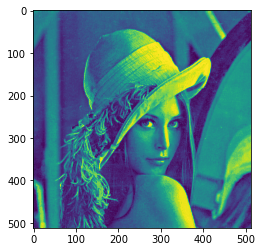

In [46]:
def get_channel(img, channel=0):
    width, height, _ = img.shape
    data = []
    for row in range(height):
        data.append([])
        for col in range(width):
            data[-1].append(img[row][col][channel])
    return data


ch1 = get_channel(img, 2)
plt.imshow(ch1)            